# Liquid-liquid equilibrium in polymer solutions

## Estimation of Flory-Huggins interaction parameter from XS test data

### Paper 2

This notebook contains an estimation procedure for the parameters of the Flory-Huggins model applied to the LLE data presented in [MATOS *et al.* (2002)](https://onlinelibrary.wiley.com/doi/full/10.1002/app.11055).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from plt_tools import get_figsize, set_plt_rc

from Tompa import Tompa

In [3]:
for_paper = True
language = 'en'

plt = set_plt_rc(plt, for_paper=for_paper)

pd.set_option('display.precision', 4)

## Experimental data

In [4]:
####################
# EXPERIMENTAL DATA
####################

z_sol = 0.97738

labels_pols = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H11']

teta1 = 1e-4*np.array([[0.72, 1.839], [0.92, 2.848], [1.62, 8.512],
                       [1.66, 5.513], [2.24, 3.986], [0.0, 6.440],
                       [1.04, 3.001],[0.70, 1.764],[1.11,4.369],[0.98,4.546]])

teta2 = 1e-4*np.array([[2.57, 8.218], [2.40, 10.12], [4.52, 20.59],
                      [4.30, 16.91], [4.22, 14.98], [3.73, 16.54],
                      [3.26, 10.49],[2.82, 5.96],[3.16, 12.89],[3.46, 13.18]])

alpha = np.array([[0.801, 0.1967],[0.777, 0.1693],[0.601, 0.1648],
                  [0.609, 0.1397],[0.664, 0.0214],[0.000, 0.1380],
                  [0.665, 0.1598],[0.947,0.2064],[0.613,0.0868],[0.637,0.0828]])

mw = np.array([865,730,396,395,313,202,600,977,559,603])

xs = 1e-2*np.array([5.30,7.89,4.96,7.26,3.86,4.61,6.21,5.49,4.52,5.86])

# creating list of objects for each polymer
polymers = [Tompa(label=labels_pols[i], z_sol = z_sol,
                  shulz_kind='3P', r_pol = np.arange(1e1,4e4),
                  teta1 = teta1[i], teta2 = teta2[i],
                  alpha = alpha[i],xs_fraction = xs[i]) 
            for i in range(len(labels_pols))]

## Parameter estimation

In [5]:
for i in range(len(polymers)):
    polymers[i].estimation()

## Plotting results

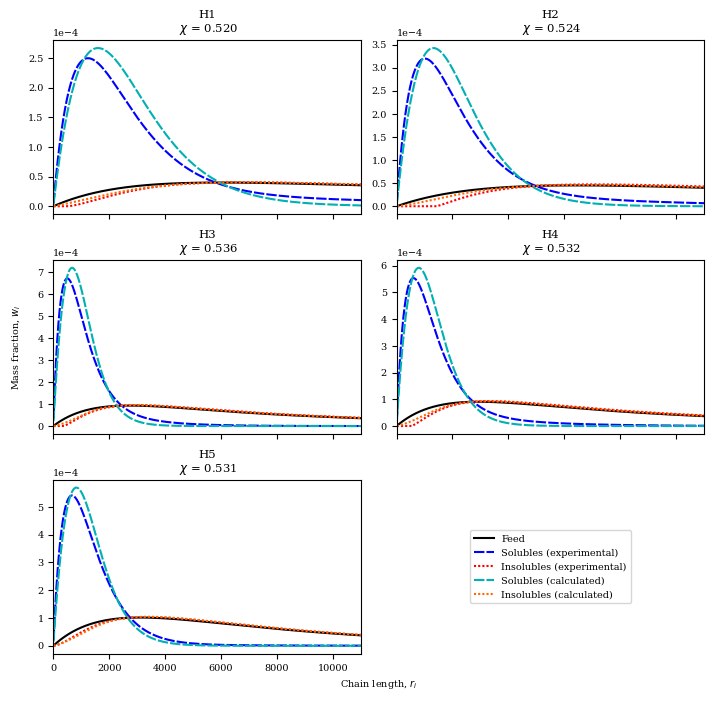

In [6]:
if for_paper:
    fs = get_figsize(columnwidth=190, hf_abs = 4/5*(230), unit='mm')

fig, ax = plt.subplots(3,2,figsize=fs,sharex=True)#,sharey=True)

for i in range(5):
    polymers[i].plot_Experimental_Distributions(ax=ax.ravel()[i])
    polymers[i].plot_Calculated_Distributions(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(labels_pols[i]+f'\n $\chi$ = {polymers[i].A:.3f}')
    ax.ravel()[i].ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
    ax.ravel()[i].set_xlim([0,1.1e4])

ax[-1,-1].axis('off')

handles, labels = ax[0,0].get_legend_handles_labels()
ax[-1,-1].legend(handles, labels, loc='center')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Chain length, $r_i$")
plt.ylabel("Mass fraction, $w_i$")

fig.tight_layout()

plt.savefig('figures/estimation_paper2_1.pdf',bbox_inches='tight')

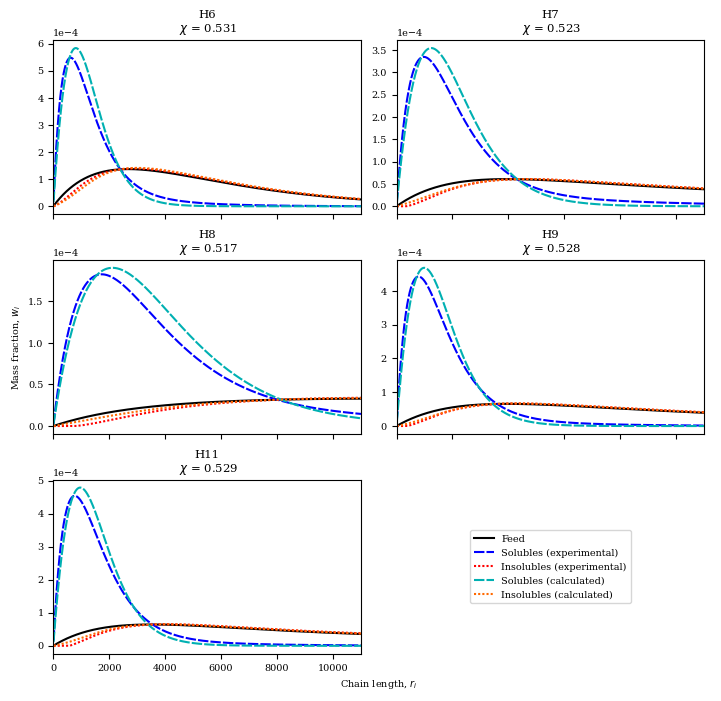

In [7]:
if for_paper:
    fs = get_figsize(columnwidth=190, hf_abs = 4/5*(230), unit='mm')

fig, ax = plt.subplots(3,2,figsize=fs,sharex=True)#,sharey=True)

for i in range(5):
    polymers[i+5].plot_Experimental_Distributions(ax=ax.ravel()[i])
    polymers[i+5].plot_Calculated_Distributions(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(labels_pols[i+5]+f'\n $\chi$ = {polymers[i+5].A:.3f}')
    ax.ravel()[i].ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))
    ax.ravel()[i].set_xlim([0,1.1e4])

ax[-1,-1].axis('off')

handles, labels = ax[0,0].get_legend_handles_labels()
ax[-1,-1].legend(handles, labels, loc='center')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Chain length, $r_i$")
plt.ylabel("Mass fraction, $w_i$")

fig.tight_layout()

plt.savefig('figures/estimation_paper2_2.pdf',bbox_inches='tight')

### $\chi$ as a function of XS and MW

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


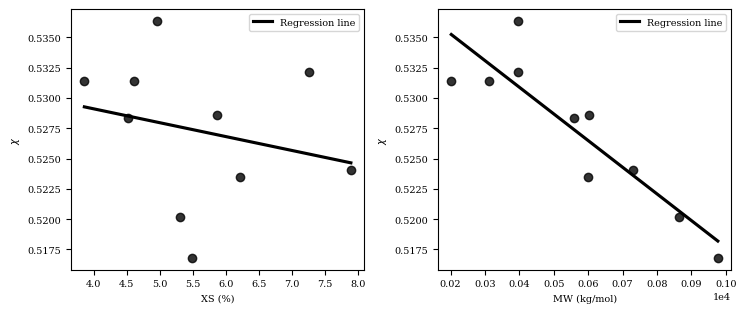

In [8]:
chi = [p.A for p in polymers]

if for_paper:
    fs = get_figsize(columnwidth=190, hf_abs = 80, unit='mm')

#a1, b1 = np.polyfit(100*xs, chi, 1)
#a2, b2 = np.polyfit(mw, chi, 1)

fig, ax = plt.subplots(1,2,figsize=fs)

#ax[0].plot(100*xs,chi,'.',c='k')
#ax[0].plot(100*xs,a1*100*xs+b1,c='k',label='Regression line')
sns.regplot(100*xs,chi,color='k',ax=ax[0],ci=None,line_kws={'label':'Regression line'})
ax[0].set_xlabel("XS (%)")
ax[0].set_ylabel("$\chi$")
ax[0].legend()

#ax[1].plot(mw,chi,'.',c='k')
#ax[1].plot(mw,a2*mw+b2,c='k',label='Regression line')
sns.regplot(mw,chi,color='k',ax=ax[1],ci=None,line_kws={'label':'Regression line'})
ax[1].set_xlabel("MW (kg/mol)")
ax[1].set_ylabel("$\chi$")
ax[1].legend()
ax[1].ticklabel_format(axis='x', style='sci', scilimits=(4,4))

fig.tight_layout()

fig.savefig('figures/xs_dependencies_paper2.pdf',bbox_inches='tight')

Pearson correlation coefficients:

In [9]:
np.corrcoef(xs, chi)[0,1]

-0.2384615518768653

In [10]:
np.corrcoef(mw, chi)[0,1]

-0.8964804869426984

## Results table

In [11]:
table_paper = pd.DataFrame([ mw,
              100*xs,
              chi,
              [p.result_estimation.fun for p in polymers],]).T
              #[(np.median(np.abs(p.xs_exp-p.xs_model))) for p in polymers],
              #[(np.median(np.abs(p.ins_exp-p.ins_model))) for p in polymers]]).T
table_paper.index = labels_pols
table_paper.columns = ['Mw (g/mol)','XS (%)','$\chi$','F_{obj}']#,'$\sigma_{sol}','$\sigma_{pol}']
table_paper.index.name='Tag'

table_paper

,Mw (g/mol),XS (%),$\chi$,F_{obj}
Tag,,,,
H1,865.0,5.30,0.5202,5.5341e-06
H2,730.0,7.89,0.5241,6.6734e-06
H3,396.0,4.96,0.5364,1.3524e-05
H4,395.0,7.26,0.5321,1.0599e-05
H5,313.0,3.86,0.5314,5.0527e-06
H6,202.0,4.61,0.5314,9.0156e-06
H7,600.0,6.21,0.5235,5.3970e-06
H8,977.0,5.49,0.5168,2.4318e-06
H9,559.0,4.52,0.5284,5.4098e-06


## Joint graph

In [13]:
mw_paper1 = [582261, 242779, 349674, 514920, 540133, 435169, 246094]

chi_paper1 = [0.5164976215306104,
 0.5358007186966057,
 0.5256286626235044,
 0.5253025696008194,
 0.5275980027542426,
 0.5292078003535349,
 0.5412269490374848]

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


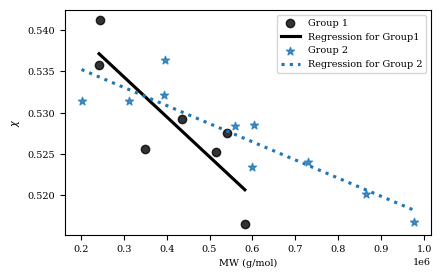

In [14]:
if for_paper:
    fs = get_figsize(columnwidth=120, unit='mm')

fig, ax = plt.subplots(figsize=fs)

sns.regplot(mw_paper1,chi_paper1,ci=None,label='Group 1',line_kws={'label':'Regression for Group1'},color='k')
sns.regplot(1000*mw,chi,ci=None,marker='*',line_kws={'ls':'dotted','label':'Regression for Group 2'},label='Group 2')

plt.legend()

plt.xlabel('MW (g/mol)')
plt.ylabel('$\chi$')

plt.savefig('figures/chi_mw_papers1and2.pdf',bbox_inches='tight');
